In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
X_train= pd.read_csv("/content/drive/My Drive/data/badbuyprediction/X_train.csv",index_col=False)
X_cv= pd.read_csv("/content/drive/My Drive/data/badbuyprediction/X_cv.csv",index_col=False)
X_test =pd.read_csv("/content/drive/My Drive/data/badbuyprediction/X_test.csv",index_col=False)
y_train =pd.read_csv("/content/drive/My Drive/data/badbuyprediction/y_train.csv",index_col=False)
y_cv=pd.read_csv("/content/drive/My Drive/data/badbuyprediction/y_cv.csv",index_col=False)

In [ ]:
def shap():
  print('Shapes of X_train.shape,X_cv.shape,y_train.shape,y_cv.shape,X_test.shape :')
  print(X_train.shape,X_cv.shape,y_train.shape,y_cv.shape,X_test.shape)
  return

In [ ]:
shap()

Shapes of X_train.shape,X_cv.shape,y_train.shape,y_cv.shape,X_test.shape :
(83908, 201) (24085, 201) (83908, 2) (24085, 2) (48707, 201)


In [ ]:
X_train=X_train.drop(X_train.columns[0],axis=1)
X_cv=X_cv.drop(X_cv.columns[0],axis=1)
X_test=X_test.drop(X_test.columns[0],axis=1)
y_train=y_train.drop(y_train.columns[0],axis=1)
y_cv=y_cv.drop(y_cv.columns[0],axis=1)

In [ ]:
shap()

Shapes of X_train.shape,X_cv.shape,y_train.shape,y_cv.shape,X_test.shape :
(83908, 200) (24085, 200) (83908, 1) (24085, 1) (48707, 200)


In [ ]:
from sklearn.metrics import precision_score ,recall_score , confusion_matrix , f1_score, accuracy_score
from sklearn.metrics import classification_report
def met(y_pred,y_true):
    print("accuracy:"+ str(accuracy_score(y_pred,y_true)))
    print("Precesion:"+ str(precision_score(y_pred,y_true)))
    print("Recall:"+ str(recall_score(y_pred,y_true)))
    print("F1 Score:"+str(f1_score(y_pred,y_true)))
    print("Confusion Matrix:")
    print(confusion_matrix(y_pred,y_true))
    return

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
import tensorflow as tf

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 406048236056941621
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14465892352
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2730258782710398293
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(200,)))
model.add(Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu', kernel_regularizer=keras.regularizers.l2(0.003)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer = keras.regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 200)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               51456     
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 32)                4128      
                                                                 
 dropout_11 (Dropout)        (None, 32)               

In [ ]:
adam = keras.optimizers.Adam(lr=1e-4)
model.compile(optimizer=adam,
             loss="sparse_categorical_crossentropy",
             metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
hist = model.fit(X_train, y_train,
                 validation_data = (X_cv,y_cv),
                 epochs = 100,
                 batch_size = 32,class_weight={0: 1., 1: 3.})

Epoch 1/100
2623/2623 [==============================] - 11s 4ms/step - loss: 1.7089 - accuracy: 0.5007 - val_loss: 1.5103 - val_accuracy: 0.1221
Epoch 2/100
2623/2623 [==============================] - 9s 4ms/step - loss: 1.2873 - accuracy: 0.5161 - val_loss: 1.3040 - val_accuracy: 0.2173
Epoch 3/100
2623/2623 [==============================] - 9s 4ms/step - loss: 1.1857 - accuracy: 0.5541 - val_loss: 1.3479 - val_accuracy: 0.2039
Epoch 4/100
2623/2623 [==============================] - 9s 4ms/step - loss: 1.1401 - accuracy: 0.5758 - val_loss: 1.1482 - val_accuracy: 0.3120
Epoch 5/100
2623/2623 [==============================] - 9s 4ms/step - loss: 1.1169 - accuracy: 0.5857 - val_loss: 1.2719 - val_accuracy: 0.2646
Epoch 6/100
2623/2623 [==============================] - 9s 4ms/step - loss: 1.0986 - accuracy: 0.5936 - val_loss: 1.2263 - val_accuracy: 0.2855
Epoch 7/100
2623/2623 [==============================] - 11s 4ms/step - loss: 1.0799 - accuracy: 0.6043 - val_loss: 1.2446 - val_

In [ ]:
test_error, test_accuracy = model.evaluate(X_cv, y_cv, verbose=1)
print(f"Test accuracy: {test_accuracy}")

753/753 [==============================] - 2s 2ms/step - loss: 0.8425 - accuracy: 0.6497
Test accuracy: 0.6496574878692627


<Figure size 3600x5400 with 0 Axes>

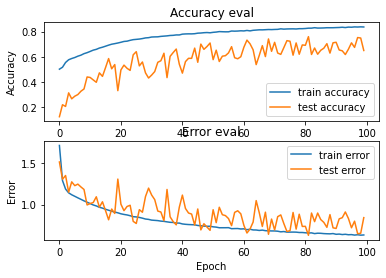

In [ ]:
plt.figure(figsize=(50,75))
fig, axs = plt.subplots(2)

# accuracy 
axs[0].plot(hist.history["accuracy"], label="train accuracy")
axs[0].plot(hist.history["val_accuracy"], label="test accuracy")    
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy eval")
    
print("\n")
# Error 
axs[1].plot(hist.history["loss"], label="train error")
axs[1].plot(hist.history["val_loss"], label="test error")    
axs[1].set_ylabel("Error")
axs[1].set_xlabel("Epoch")
axs[1].legend(loc="upper right")
axs[1].set_title("Error eval")
    
plt.show()

In [ ]:
y_pred = model.predict(X_cv)
y_pred = np.argmax(y_pred, axis=-1)
print("Cross Validation Metrics")
met(y_pred,y_cv)
print("___________******************************____________")
print(classification_report(y_pred,y_cv))
print("___________******************************____________")

Cross Validation Metrics
accuracy:0.649657463151339
Precesion:0.5455472467709042
Recall:0.18435561681598897
F1 Score:0.27558379120879123
Confusion Matrix:
[[14042  1337]
 [ 7101  1605]]
___________******************************____________
              precision    recall  f1-score   support

           0       0.66      0.91      0.77     15379
           1       0.55      0.18      0.28      8706

    accuracy                           0.65     24085
   macro avg       0.60      0.55      0.52     24085
weighted avg       0.62      0.65      0.59     24085

___________******************************____________


**Conclusion**


*   Recall is low for validation data set
*   Tried to assign weights but recall didnt improve
*   Model is bad at predicting Isbadbuy, prediction has more false negatives missing a lot of bad purchases
*   It effected the accuracy 


